<a href="https://colab.research.google.com/github/Khushi-MA/loss_optim/blob/main/understanding_loss_function_on_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("using device", device)

using device cpu


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

classes = trainset.classes
print("Classes: ", classes)

100%|██████████| 170M/170M [00:02<00:00, 76.1MB/s]


Classes:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# simple CNN model

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)

In [ ]:
# loss function and optimiser
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
# training loop
all_losses = []

for epoch in range(5):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # zero parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimizer
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        all_losses.append(loss.item())  # record batch loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i%100 == 99:
            # print 100th mini batches
            print(f"[{epoch+1}, {i+1}] loss: {running_loss/100:0.3}")
            running_loss = 0.0

print("Finished training")

[1, 100] loss: 1.94
[1, 200] loss: 1.58
[1, 300] loss: 1.44
[1, 400] loss: 1.38
[1, 500] loss: 1.33
[1, 600] loss: 1.29
[1, 700] loss: 1.25
[2, 100] loss: 1.13
[2, 200] loss: 1.1
[2, 300] loss: 1.08
[2, 400] loss: 1.09
[2, 500] loss: 1.05
[2, 600] loss: 1.03
[2, 700] loss: 1.01
[3, 100] loss: 0.928
[3, 200] loss: 0.941
[3, 300] loss: 0.939
[3, 400] loss: 0.906
[3, 500] loss: 0.908
[3, 600] loss: 0.913
[3, 700] loss: 0.919
[4, 100] loss: 0.827
[4, 200] loss: 0.835
[4, 300] loss: 0.803
[4, 400] loss: 0.817
[4, 500] loss: 0.809
[4, 600] loss: 0.811
[4, 700] loss: 0.811
[5, 100] loss: 0.729
[5, 200] loss: 0.722
[5, 300] loss: 0.729
[5, 400] loss: 0.748
[5, 500] loss: 0.737
[5, 600] loss: 0.745
[5, 700] loss: 0.729
Finished training


In [ ]:
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = False, num_workers = 2)

correct = 0
total = 0
model.eval()

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"test accuracy: {100 * correct / total:.2f}%")

test accuracy: 69.68%


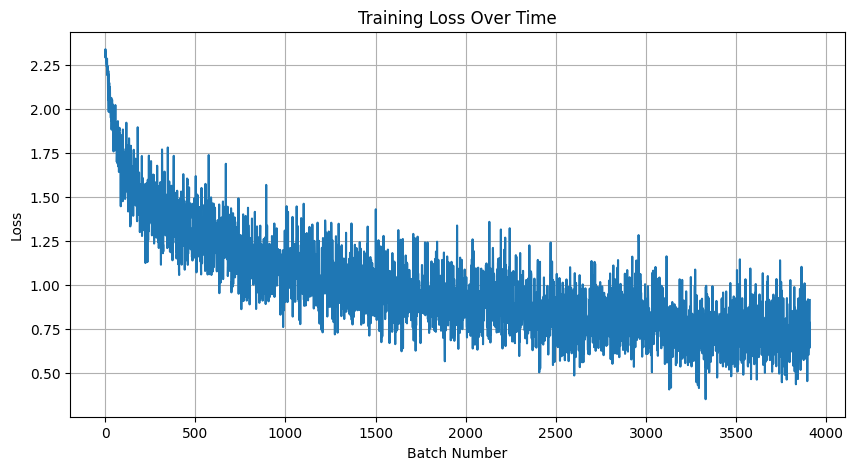

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(all_losses)
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.grid(True)
plt.show()
